# Лабораторная работа 5 Логическая регрессия

## Подключение библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [ ]:
dataset = pd.read_csv('forestfires.csv')
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[5]
 [4]
 [4]
 [6]
 [6]]
Зависимая переменная
['mar' 'oct' 'oct' 'mar' 'mar']


## Обработка пропущенных значений

In [ ]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])
# print(X)

## Обработка категориальных данных

### Замена категории кодом (LabelEncoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = dataset['day']

labelencoder_y = LabelEncoder()

print("Зависимая переменная до обработки")

print(y.unique())

y = labelencoder_y.fit_transform(y)

print("Зависимая переменная после обработки")

print(y)

Зависимая переменная до обработки
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
Зависимая переменная после обработки
[0 5 2 0 3 3 1 1 5 2 2 2 0 1 6 0 2 1 6 2 5 1 3 2 2 3 0 1 2 3 0 1 0 3 1 5 5
 0 2 5 5 2 5 2 6 6 1 1 1 1 4 3 6 6 4 4 5 3 1 0 3 3 4 3 1 4 0 0 0 0 0 0 0 5
 0 4 0 1 0 5 3 3 5 6 4 4 4 4 3 2 2 0 3 3 1 3 2 2 3 3 3 5 5 2 2 0 4 3 2 1 0
 0 3 1 5 5 2 2 1 4 1 1 3 5 0 3 1 0 6 3 2 1 3 4 5 2 3 1 5 5 1 6 0 2 6 4 1 5
 5 4 0 3 2 0 2 3 2 6 6 0 1 4 2 2 3 4 6 6 0 4 6 6 3 1 2 2 4 3 6 5 3 1 3 1 0
 5 3 1 2 3 0 4 5 6 5 0 4 4 5 1 5 3 3 6 2 4 2 5 0 4 2 2 0 1 2 2 3 1 6 1 3 0
 1 0 6 3 1 2 3 2 6 3 5 5 2 3 2 5 2 3 6 0 3 3 3 3 3 6 6 6 6 6 6 4 4 4 2 2 2
 2 1 0 0 0 0 5 5 5 5 5 5 5 5 3 6 4 1 1 1 1 0 5 3 6 0 3 6 2 2 2 2 2 0 5 5 3
 3 3 6 2 1 1 0 0 2 3 3 3 3 3 3 3 3 6 6 6 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 2 3
 3 6 3 4 0 2 1 2 4 3 6 4 6 4 2 3 3 4 0 0 1 0 3 5 1 3 3 3 2 6 6 4 0 4 6 5 2
 2 0 5 0 0 1 2 3 4 5 6 3 3 6 6 3 2 2 4 4 1 4 3 4 2 4 3 0 2 1

### Применение OneHotEncoder

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# onehotencoder = OneHotEncoder(categorical_features = [0])
# X = onehotencoder.fit_transform(X).toarray()
# print("Перекодировка категориального признака")
# print(X)

## Разделение выборки на тестовую и тренировочную

In [ ]:
 # from sklearn.cross_validation import train_test_split
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение модели

### Обучение логической модели регрессии


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## Предсказание, обработка и визуализация результатов

Train accuracy: 0.1937046004842615
Test accuracy: 0.17307692307692307


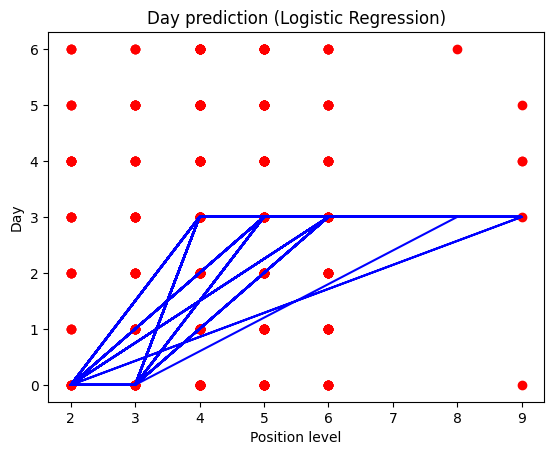

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, log_reg.predict(X_train), color='blue')
plt.title('Day prediction (Logistic Regression)')
plt.xlabel('Position level')
plt.ylabel('Day')
plt.show()